In [1]:
pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.6 MB/s eta 0:00:00


In [3]:
pip install tensorflow

In [2]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#preparing data
num_qubits = 6
matrix_size = 2**num_qubits
num_repetitions = 1000
Mz_values = np.zeros((num_repetitions, matrix_size))

eigenvalues = []
eigenvectors = []

for repetition in range(num_repetitions):
    np.random.seed(repetition)
    J = np.random.uniform(low=-1, high=0, size=(num_qubits, num_qubits))
    for i in range(num_qubits):
        for j in range(num_qubits):
            if i >= j:
                J[i, j] = 0
    J = (J + J.T)

    np.random.seed(repetition + 10)
    K = np.random.uniform(low=-1, high=1, size=(num_qubits, num_qubits))
    for i in range(num_qubits):
        for j in range(num_qubits):
            if i >= j:
                K[i, j] = 0
    K = (K + K.T)

    np.random.seed(repetition + 20)
    h = np.random.uniform(low=-0.04, high=0.04)

    np.random.seed(repetition + 30)
    g = np.random.uniform(low=-6, high=6, size=num_qubits)

    matrix = np.zeros((matrix_size, matrix_size))
    for i in range(matrix_size):
        for j in range(matrix_size):
            H_value = 0
            for i1 in range(num_qubits):
                for j1 in range(num_qubits):
                    if j == i ^ (2 ** i1 + 2 ** j1):
                        H_value += K[i1, j1]
                    if j == i:
                        sign = 1
                        if (i & 2 ** i1) != 0:
                            sign = -sign
                        if (i & 2 ** j1) != 0:
                            sign = -sign

                        H_value += sign * J[i1, j1]

            for i1 in range(num_qubits):
                if j == i ^ (2 ** i1):
                    H_value += g[i1]

            if j == i:
                H_value += h
            matrix[i, j] = H_value

    eigenval, eigenvect = np.linalg.eigh(matrix)

    min_eigenval = np.min(eigenval)
    min_eigenvec = eigenvect[np.argmin(eigenval), :]

    eigenvalues.append(min_eigenval)
    eigenvectors.append(min_eigenvec)

eigenvectors_matrix = np.column_stack(eigenvectors)

Mzt = []
for column in eigenvectors_matrix.T:
    i = 0
    Mz = 0
    for component in column:
        for n_prime in range(num_qubits):
         if (2 ** n_prime) & i != 0 :
             Mz += abs(component) ** 2  / num_qubits
        i += 1
    Mz=2*Mz-1
    Mzt.append(Mz)

Mzt_row = np.array(Mzt)
final_data = np.vstack((eigenvectors_matrix, Mzt_row))

In [4]:
from sklearn.model_selection import train_test_split

# Convert data to TensorFlow tensors
features = np.array(eigenvectors)
labels = np.array(Mzt_row)

# Split the data into training, testing, and validation sets
features_train, features_temp, labels_train, labels_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
features_val, features_test, labels_val, labels_test = train_test_split(features_temp, labels_temp, test_size=0.5, random_state=42)

# Print the shapes of the sets
print("Training set shapes:", features_train.shape, labels_train.shape)
print("Validation set shapes:", features_val.shape, labels_val.shape)
print("Testing set shapes:", features_test.shape, labels_test.shape)



Training set shapes: (700, 64) (700,)
Validation set shapes: (150, 64) (150,)
Testing set shapes: (150, 64) (150,)


Epoch 1/30
175/175 - 1s - 8ms/step - loss: 0.0776 - mae: 0.1957 - val_loss: 0.0089 - val_mae: 0.0764
Epoch 2/30
175/175 - 0s - 2ms/step - loss: 0.0062 - mae: 0.0632 - val_loss: 0.0059 - val_mae: 0.0597
Epoch 3/30
175/175 - 1s - 3ms/step - loss: 0.0037 - mae: 0.0490 - val_loss: 0.0044 - val_mae: 0.0506
Epoch 4/30
175/175 - 0s - 2ms/step - loss: 0.0025 - mae: 0.0400 - val_loss: 0.0036 - val_mae: 0.0459
Epoch 5/30
175/175 - 0s - 2ms/step - loss: 0.0019 - mae: 0.0341 - val_loss: 0.0032 - val_mae: 0.0418
Epoch 6/30
175/175 - 1s - 4ms/step - loss: 0.0014 - mae: 0.0296 - val_loss: 0.0028 - val_mae: 0.0393
Epoch 7/30
175/175 - 1s - 4ms/step - loss: 0.0012 - mae: 0.0269 - val_loss: 0.0026 - val_mae: 0.0375
Epoch 8/30
175/175 - 1s - 4ms/step - loss: 9.6898e-04 - mae: 0.0245 - val_loss: 0.0024 - val_mae: 0.0357
Epoch 9/30
175/175 - 1s - 3ms/step - loss: 8.0475e-04 - mae: 0.0222 - val_loss: 0.0022 - val_mae: 0.0337
Epoch 10/30
175/175 - 1s - 4ms/step - loss: 6.8930e-04 - mae: 0.0207 - val_loss: 0.

<ipython-input-18-52ef2cb10fd3>:149: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


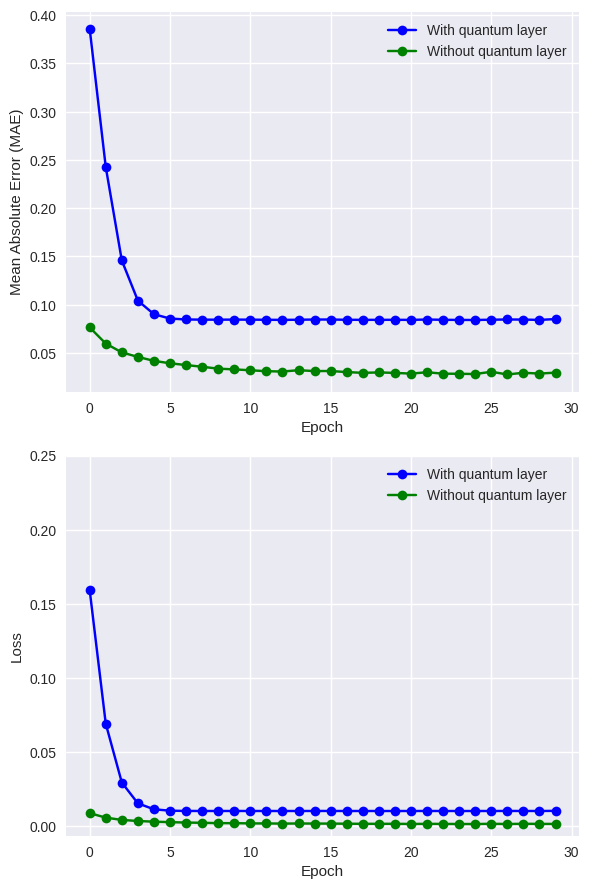

In [18]:
import numpy as np
import pennylane as qml
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Number of qubits (filter size)
F = 4  # Adjust as needed
num_qubits = F

# Create a quantum device
dev = qml.device("default.qubit", wires=num_qubits)

@qml.qnode(dev)
def circuit(segment, weights):

    # Apply parameterized RY rotations with trainable weights
    for i in range(num_qubits):
        qml.RY(segment[i], wires=i)
        qml.RX(weights[i], wires=i)  # Parameterized RX gates (learnable parameters)

    # Example entangling layer (CNOTs)
    for i in range(num_qubits - 1):
        qml.CNOT(wires=[i, i + 1])

    # Return the expectation values of Pauli-Z measurements
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]

# Quantum convolution function (with reduction step to match the number of labels)
def quanv(feature_array, filter_size, weights, stride=3):
    """Quantum convolution function that sweeps the quantum filter over the feature array.

    Args:
        feature_array: the input feature array (length E).
        filter_size: the number of qubits (F) in the quantum circuit.
        weights: the trainable weights for the quantum circuit.
        stride: the step size for sliding the filter across the feature array.

    Returns:
        A reduced output from the quantum circuit as it sweeps across the input array.
    """
    E = len(feature_array)
    outputs = []

    # Slide the quantum filter across the feature array with the given stride
    for start in range(0, E - filter_size + 1, stride):
        segment = feature_array[start:start + filter_size]  # Extract the segment of size 'filter_size'
        circuit_output = circuit(segment, weights)  # Apply the quantum filter to the segment
        outputs.append(circuit_output)  # Append the result

    # Reduce the outputs (e.g., by averaging over the outputs)
    reduced_output = np.mean(outputs, axis=0)  # You can choose another reduction technique if preferred

    return reduced_output  # Return the reduced output as a numpy array
# Initialize the trainable weights for the quantum filter
trainable_weights = np.random.uniform(high=2 * np.pi, size=(F,))

# Apply the quantum convolution with trainable weights
output = quanv(features, F, trainable_weights, stride=3)

# Modify the ClassicalModel and QuantumModel functions to use 'mse'
def ClassicalModel():
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),  # Classical dense layer
        keras.layers.Dense(1)  # For regression, use a single output node
    ])

    model.compile(
        optimizer='adam',
        loss="mse",
        metrics=["mae"],
    )
    return model

def QuantumModel():
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(1)  # For regression, use a single output node
    ])

    model.compile(
        optimizer='adam',
        loss="mse",  # Change here
        metrics=["mae"],  # Optionally, you can use Mean Absolute Error (mae) as a metric
    )
    return model

# Initialize and train the classical model
c_model = ClassicalModel()
c_history = c_model.fit(
    features_train,  # Use classical features directly
    labels_train,
    validation_data=(features_val, labels_val),
    batch_size=4,
    epochs=30,
    verbose=2,
)


from functools import partial

# Initialize the trainable weights for the quantum filter
trainable_weights = np.random.uniform(high=2 * np.pi, size=(num_qubits,))

# Create a partial function that includes the filter_size and weights
quanv_partial = partial(quanv, filter_size=num_qubits, weights=trainable_weights)

# Quantum preprocessing with reduced output
q_train_features = np.apply_along_axis(quanv_partial, 1, features_train)  # Apply quanv along each row
q_val_features = np.apply_along_axis(quanv_partial, 1, features_val)  # Apply quanv along each row

# Reshape the features for compatibility with Keras
q_train_features = q_train_features.reshape(-1, num_qubits)  # Adjust num_qubits as needed
q_val_features = q_val_features.reshape(-1, num_qubits)  # Adjust num_qubits as needed

# Reshape labels for regression
labels_train = labels_train.reshape(-1, 1)
labels_val = labels_val.reshape(-1, 1)

# Reshape the features for compatibility with Keras
q_train_features = q_train_features.reshape(-1, num_qubits)  # Adjust num_qubits as needed
q_val_features = q_val_features.reshape(-1, num_qubits)  # Adjust num_qubits as needed

# Reshape labels for regression
labels_train = labels_train.reshape(-1, 1)
labels_val = labels_val.reshape(-1, 1)

# Reshape the features for compatibility with Keras
q_train_features = q_train_features.reshape(-1, num_qubits)  # Adjust num_qubits as needed
q_val_features = q_val_features.reshape(-1, num_qubits)  # Adjust num_qubits as needed

# Reshape labels for regression
labels_train = labels_train.reshape(-1, 1)
labels_val = labels_val.reshape(-1, 1)

# Initialize and train the quantum model
q_model = QuantumModel()
q_history = q_model.fit(
    q_train_features,
    labels_train,
    validation_data=(q_val_features, labels_val),
    batch_size=4,
    epochs=30,
    verbose=2,
)

# Plotting the results
plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_mae"], "-ob", label="With quantum layer")
ax1.plot(c_history.history["val_mae"], "-og", label="Without quantum layer")
ax1.set_ylabel("Mean Absolute Error (MAE)")
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=0.25)
ax2.set_xlabel("Epoch")
ax2.legend()

plt.tight_layout()
plt.show()


In [12]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.5 MB/s eta 0:00:00


In [15]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.0 MB/s eta 0:00:00


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit

# Define the number of qubits
num_qubits = 4

# Initialize a Qiskit quantum circuit
qc = QuantumCircuit(num_qubits)

# Segment and weights for parameterized RY and RX gates
segment = np.random.uniform(0, 2 * np.pi, num_qubits)
weights = np.random.uniform(0, 2 * np.pi, num_qubits)

# Apply parameterized RY rotations with trainable weights
for i in range(num_qubits):
    qc.ry(segment[i], i)
    qc.rx(weights[i], i)

# Add CNOTs for entanglement
for i in range(num_qubits - 1):
    qc.cx(i, i + 1)

# Draw the circuit using Qiskit's matplotlib drawer
qc.draw()



┌────────────┐┌────────────┐               
q_0: ┤ Ry(5.5027) ├┤ Rx(6.1038) ├──■────────────
     ├───────────┬┘├────────────┤┌─┴─┐          
q_1: ┤ Ry(3.556) ├─┤ Rx(3.6452) ├┤ X ├──■───────
     ├───────────┴┐├────────────┤└───┘┌─┴─┐     
q_2: ┤ Ry(3.4795) ├┤ Rx(3.3008) ├─────┤ X ├──■──
     ├────────────┤├────────────┤     └───┘┌─┴─┐
q_3: ┤ Ry(3.1041) ├┤ Rx(4.3096) ├──────────┤ X ├
     └────────────┘└────────────┘          └───┘